<a href="https://colab.research.google.com/github/veroggg79/AMORTIZATIONS/blob/main/section5_sklearn_statsmodels_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 5: Regresiones con Scikit-Learn y StatsModels

# 5.1. Regresión Lineal - Principios teóricos

Una regresión lineal es una aproximación de una relación causal entre dos o más variables. En términos prácticos consiste en encontrar la recta que mejor ajusta a un conjunto de datos para entender la relación entre las variables, o bien, para predecir nuevos valores. La regresión puede ser simple (una variable independiente) o múltiple (varias variables independientes).

Es una de las formas más utilizadas para hacer inferencias sobre los datos y crear modelos de Machine Learning.

Entendamos éstos conceptos derivando el modelo de una regresión lineal simple, es decir, una variable independiente y una variable dependiente:

1. Tenemos unos datos de prueba que siguen un patrón o que tienen una relación entre las variables.
2. Constuímos la regresión (calculamos los coeficientes) suponiendo que éstos datos siguen una relación lineal dada por la fórmula Yα = β0 + β1Xα + εα. Donde X es la variable independiente y Y la variable dependiente. Siendo β0 y β1 constantes.
3. Hacemos predicciones sobre la variable independiente usando el modelo y datos nuevos.

# 5.1.1. Significado de β0, β1 y εα
β1, el coeficiente que acompaña a la X cuantifica el efecto de la variable X sobre la variable Y. Así, mientras más grande sea β1, más será el efecto que tendrá la variable independiente sobre la variable dependiente Y. Por su parte, β0 representa el valor que toma la variable Y cuando no hay influencia de la variable X. Es decir, cuando X = 0. εα representa el error de la estimación respecto a esa observación, ya que es la diferencia entre la variable observada y la variable predicha.

# 5.1.2. R^2
Es una medida relativa que toma los valores de 0 a 1 e indica una medida de calidad del modelo. 0 significa que el modelo no explica la variabilidad de los datos, mientras que 1 significa que el modelo explica totalmente la variabilidad de los datos. Se usa comunmente para dar un score o puntaje al modelo. La desventaja principal de R^2 es que tiende a aumentar cuando se agregan variables al modelo, lo que se traduce en un sobreajuste del modelo.

# Cuándo un modelo o regresión es bueno?
Normalmente en ciencias puras como física o matemáticas, se busca un R^2 de 0.7 a 0.99. Pero en ciencias humanas debido a la naturaleza de los datos y su mayor variabilidad, éste valor puede disminuir mucho y aún así ser un buen indicativo.

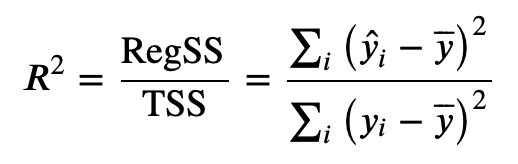

# 5.1.3. R^2 Ajustado
El R^2 ajustado es una versión modificada del R^2 original que tiene en cuenta el número de variables independientes en el modelo. Penaliza la adición de variables que no mejoran significativamente el modelo. Es decir, si se agregan variables independientes no significativas, R^2 ajustado tenderá a disminuir.
Muy útil a la hora de comparar modelos.

#5.1.4. Representación geométrica de una regresión lineal

Geométricamente, la regresión lineal representa la línea recta que mejor se ajusta al conjunto de datos.
β0 es el intercepto con el eye Y y β1 es la derivada o pendiente de la recta. La distancia entre la observación (el punto) y la recta de la regresión es el valor de εα.

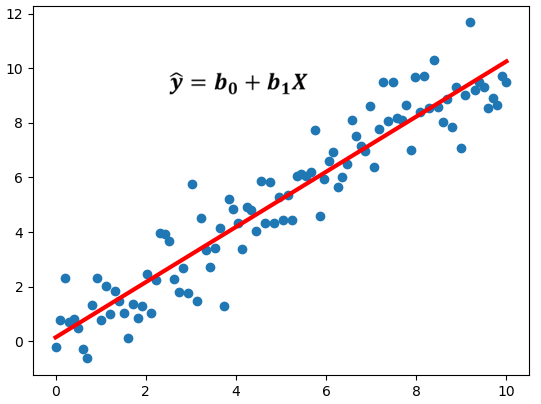

# 5.1.5. Suposiciones de la regresión lineal

**1. Linealidad:** Asume que la relación entre las variables independientes y la variable dependiente es lineal. En otros términos, la ecuación es una ecuación lineal de una o varias variables. Graficamente se puede verificar graficando la variable dependiente frente a algunas de las variables independientes.

**2. No Endogeneidad:** La endogeneidad ocurre cuando hay una correlación entre una o más variables independientes y el término de error. Esto a menudo ocurre cuando se excluyen variables estadísticamente significativas y por tanto ésta información queda incluída en el término de error. Una regresión lineal debe incluir todas las variables significativas.

**3. Media de los errores cero:** La media de los errores o residuos debe ser cero (en la práctica, valores muy cercanos a cero). Ésto significa que el modelo no sesga positiva o negativamente el resultado. Ya que si lo hiciese, no sería el mejor ajuste a los datos.

**4. Homocedasticidad:** Se refiere a que la varianza de los errores es la misma para todas las observaciones. Esto implica que dispersión alrededor de la regresión debe ser constante. Ya que si no lo es, tendríamos una dependencia entre la predicción y el valor de la observación.

**5. No autocorrelación:** No debe haber correlación entre los errores o residuos del modelo en diferentes observaciones. Por ejemplo: Series de tiempo, ya que hay una dependencia temporal entre los errores.

**6. No multicolinealidad:** La multicolinealidad es cuando dos o más variables son linealmente dependientes. Es decir, una puede escribirse en términos de la otra. Es decir, se podría eliminar una de las variables.

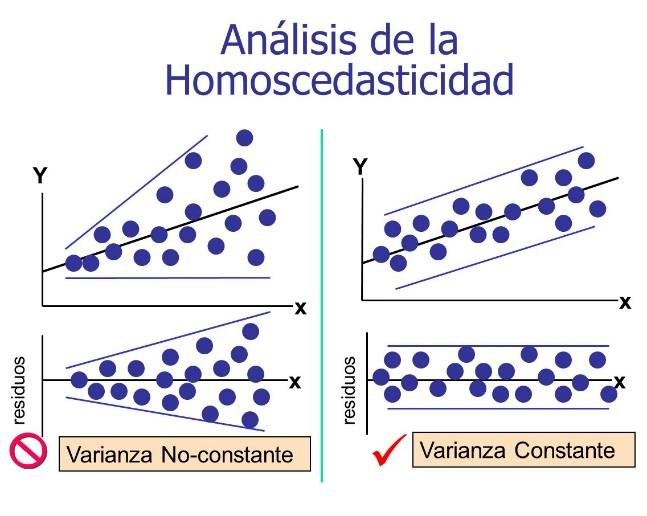

# 5.2. Implementando una regresión lineal desde cero en Python



Para implementar una regresión lineal de cero en Python, debemos saber cómo calcular los coeficientes β0 y β1 con los cuáles podremos calcular nuevos valores. Para ésto podemos tomar como métrica de error la suma de errores cuadrados SSE (sum of squared errors) dada por la suma de las diferencias de los valores predichos y observados al cuadrado. Ésto es lo que se conoce como el método de Mínimos Cuadrados (OLS):

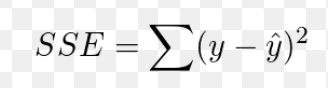

Los coeficientes β0 y β1 deben ser tales que minimicen la función de error. Para hallar estos valores debemos derivar parcialmente respecto a las variables β0 y β1 y resolver el sistema de ecuaciones.

# 5.2.1. Cálculo de los coeficientes β0 y β1

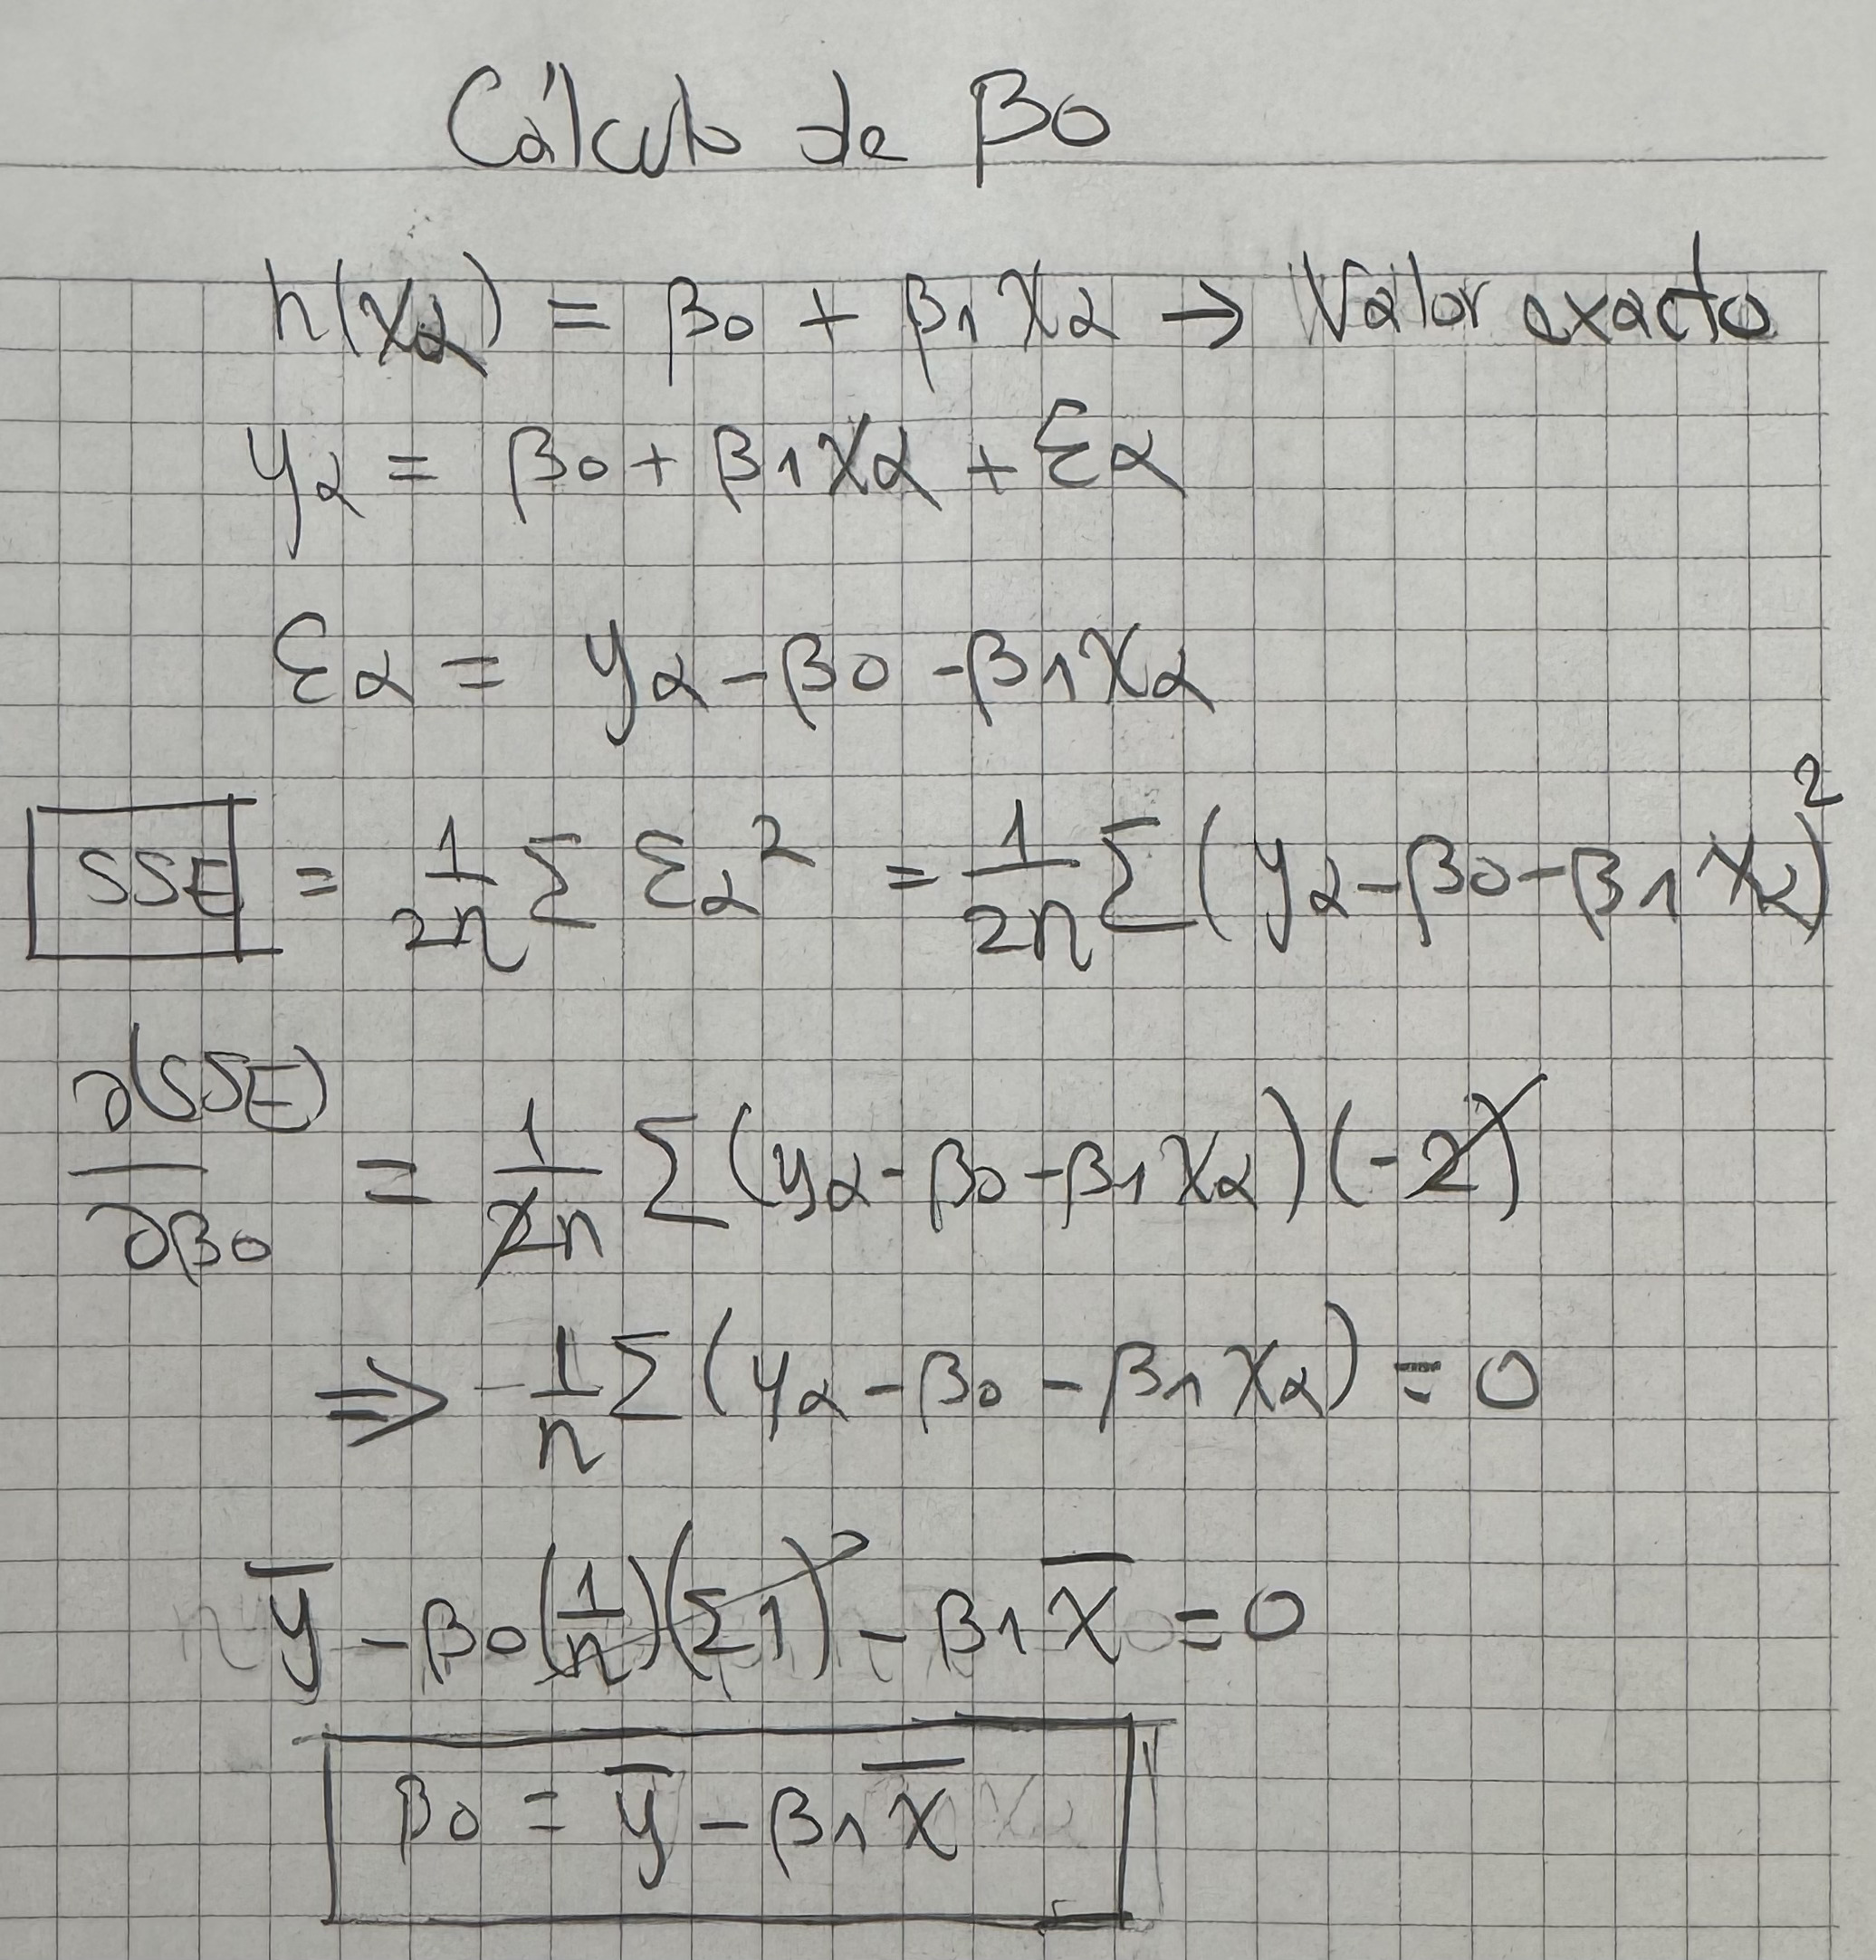

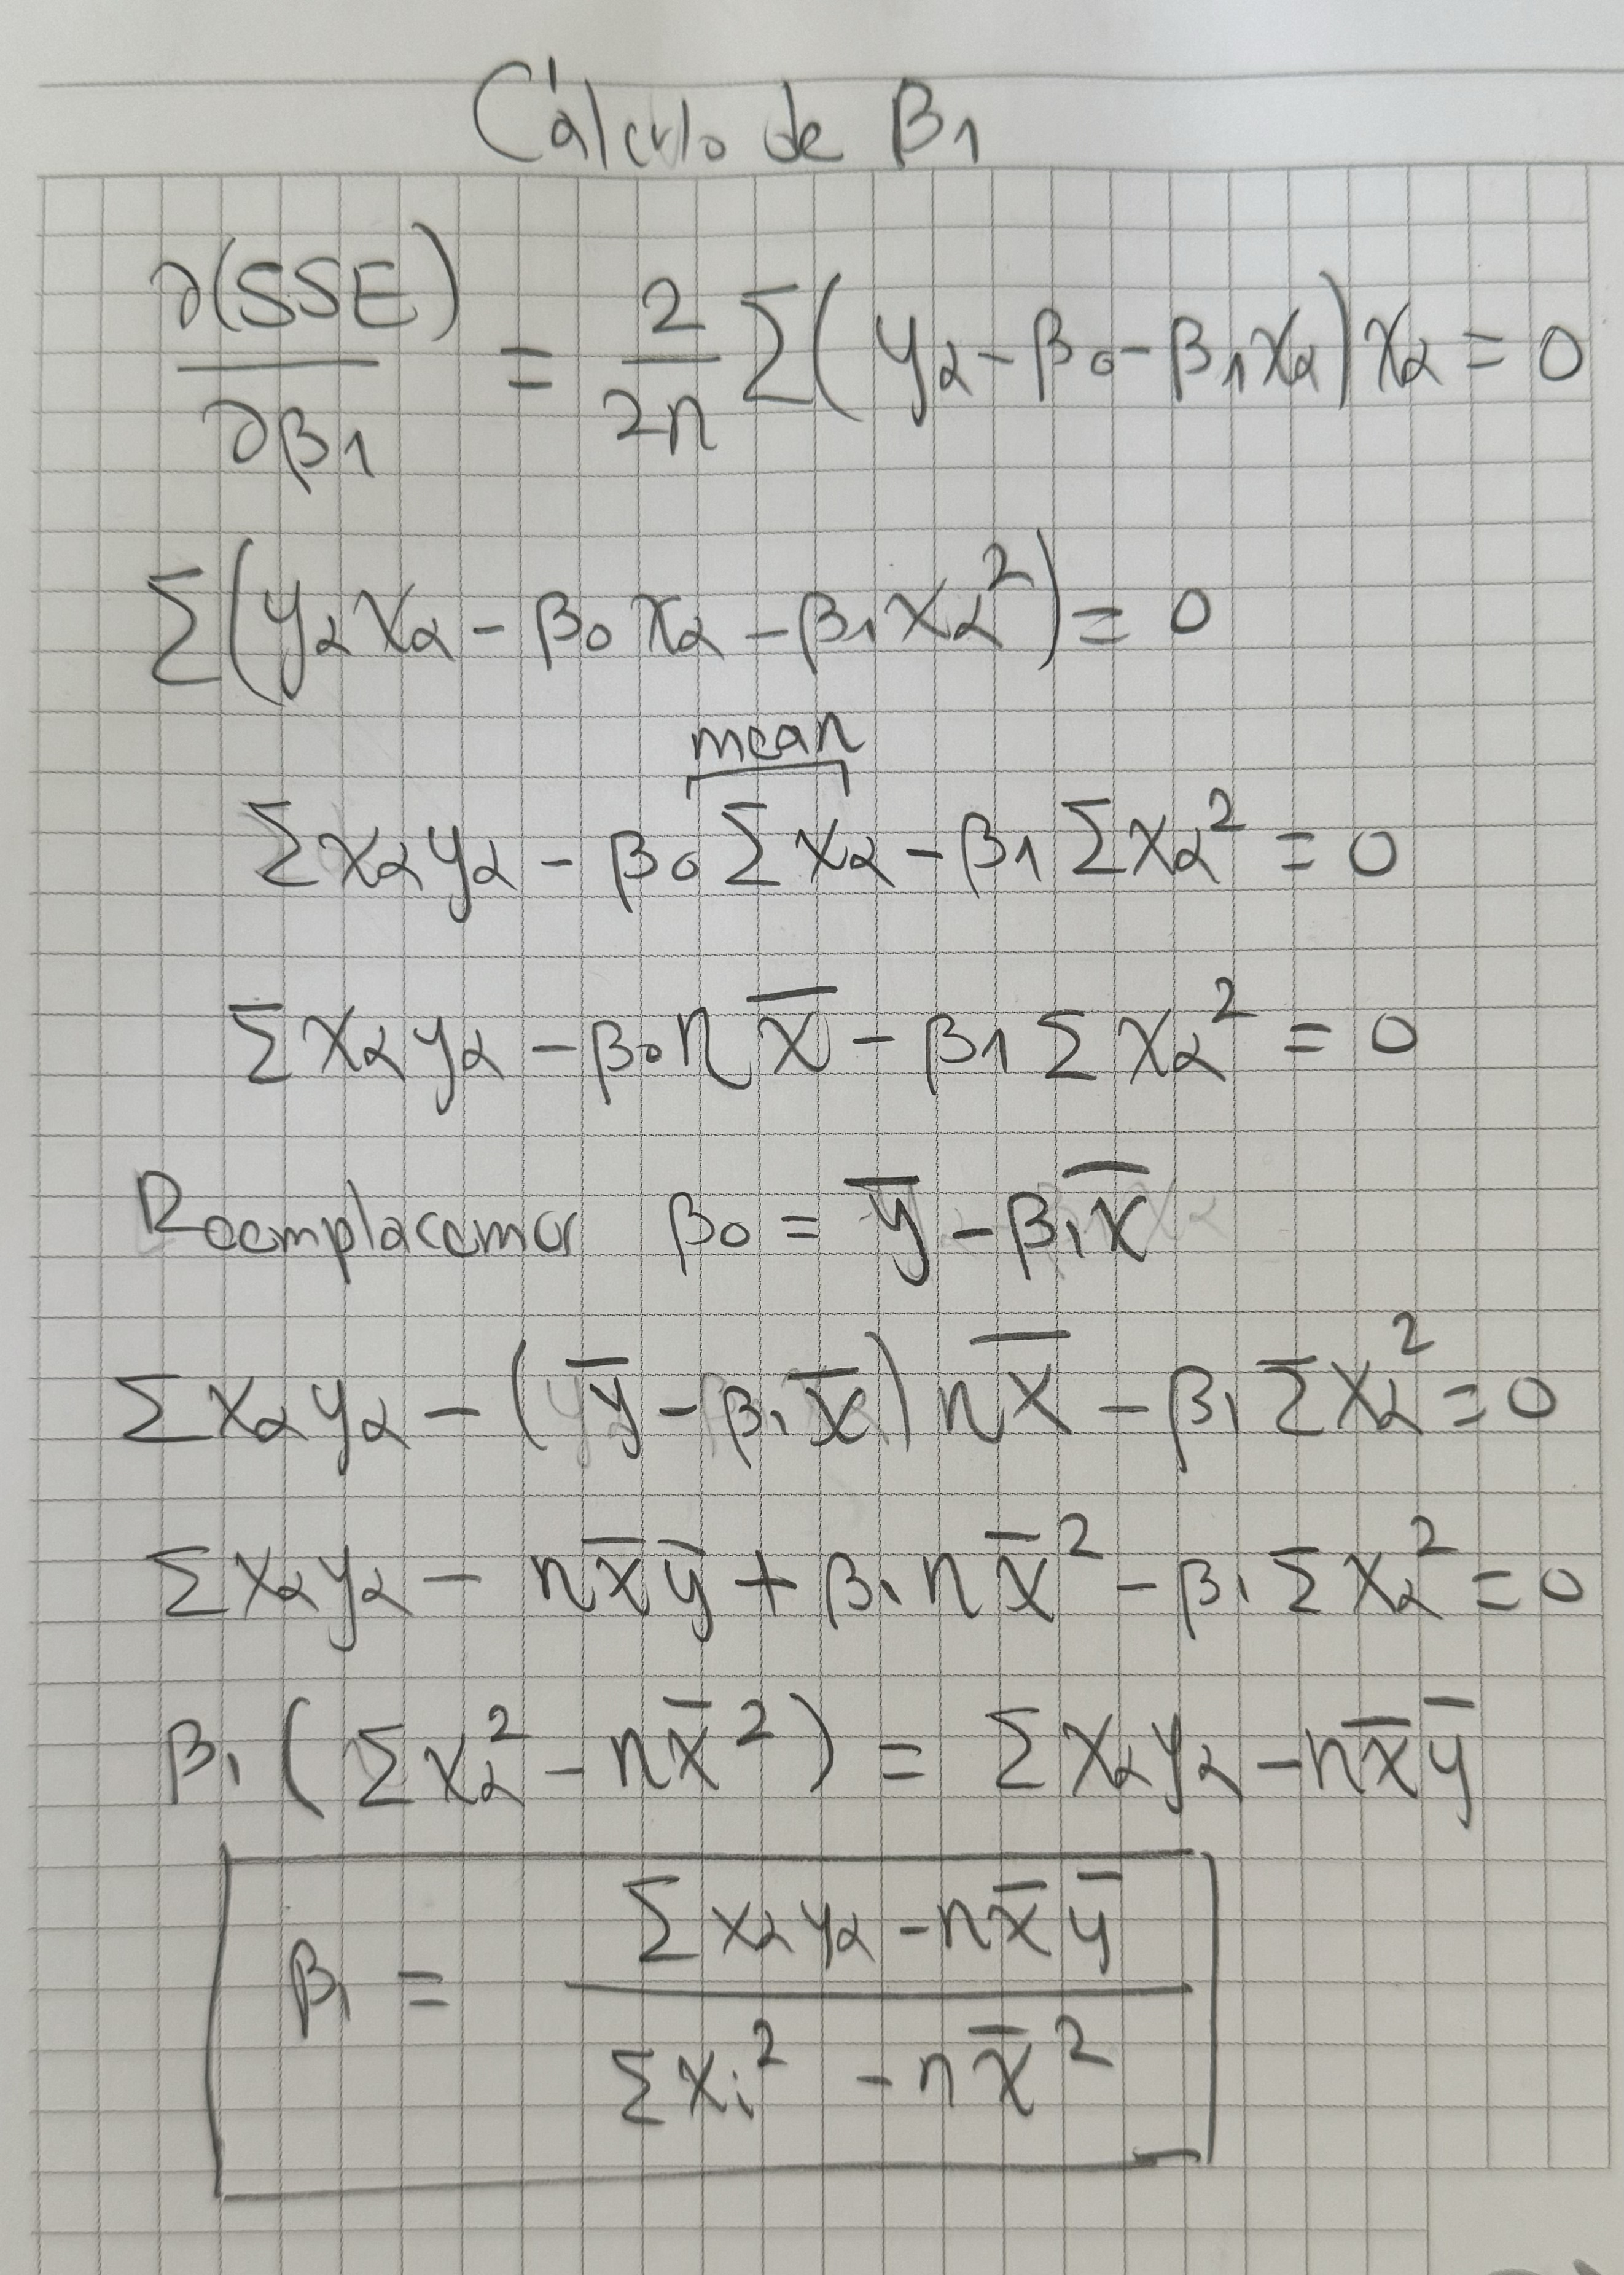

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:

    b0 = b1 = None

    def __init__(self):
        pass

    def __str__(self) -> str:
        b0 = f"{self.b0:.2f}" if self.b0 else self.b0
        b1 = f"{self.b1:.2f}" if self.b1 else self.b1
        return f"LinearRegression(B0 = {b0}, B1 = {b1})"

    def __calculate_b1(self, x: np.ndarray, y: np.ndarray) -> float:
        n = len(x)
        xiyi = 0
        xi2 = 0

        for i in range(n):
            xiyi += x[i] * y[i]
            xi2 += x[i] ** 2

        return (xiyi - n * x.mean() * y.mean()) / (xi2 - n * x.mean() ** 2)

    def __calculate_b0(self, x: np.ndarray, y: np.ndarray) -> float:
        return y.mean() - self.b1 * x.mean()

    def coef(self):
        return (self.b0, self.b1)

    def fit(self, x_train: np.ndarray, y_train: np.ndarray) -> None:
        self.b1 = self.__calculate_b1(x_train, y_train)
        self.b0 = self.__calculate_b0(x_train, y_train)

    def predict(self, x: np.ndarray) -> np.ndarray:
        return self.b0 + self.b1 * x

    def score(self, x: np.ndarray, y: np.ndarray): # adjusted R square
        y_pred = self.predict(x)

        SSR = ((y_pred - y.mean()) * (y_pred - y.mean())).sum() #sum of squares regression
        SST = ((y - y.mean()) * (y - y.mean())).sum()  # sum of squares total
        return SSR / SST

regressor = LinearRegression()
print(regressor)

LinearRegression(B0 = None, B1 = None)


# Ejemplo: Predicción de salarios usando regresiones lineales

Consideremos el siguiente conjunto de datos que describe los salarios de un conjunto de empleados de una compañía cuando cumple determinados años de experiencia: https://www.kaggle.com/code/codebreaker619/employee-salary-prediction-using-linear-regression/input

Usemos el modelo construído anteriormente para predecir el salario de un empleado de dicha compañía cuando cumple 15 años de experiencia.



In [ ]:
import pandas as pd

salaries = pd.read_csv("salary.csv")
salaries.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [ ]:
salaries.describe()

YearsExperience         Salary
count        35.000000      35.000000
mean          6.308571   83945.600000
std           3.618610   32162.673003
min           1.100000   37731.000000
25%           3.450000   57019.000000
50%           5.300000   81363.000000
75%           9.250000  113223.500000
max          13.500000  139465.000000

Vamos a crear los arreglos X y Y para entrenar el modelo, pero primero veamos la dispersión de los datos:

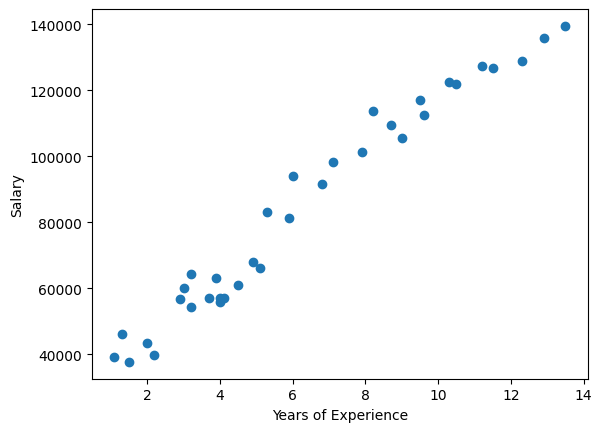

In [ ]:
import matplotlib.pyplot as plt

x_years = salaries["YearsExperience"]
y_salary = salaries["Salary"]

plt.scatter(x_years, y_salary)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Entrenemos nuestro modelo con los datos que tenemos:

In [ ]:
import numpy as np

X_years = x_years.to_numpy()
Y_salary = y_salary.to_numpy()

regressor = LinearRegression()
regressor.fit(X_years, Y_salary)
r2 = regressor.score(X_years, Y_salary)
print(regressor)
print("With a R^2 value of:", r2)

LinearRegression(B0 = 28859.53, B1 = 8731.94)
With a R^2 value of: 0.9651633106751442


Veamos graficamente nuestra regresión lineal:

In [ ]:
b0, b1 = regressor.coef()
print(f"b0: {b0}, b1: {b1}")

b0: 28859.526194531478, b1: 8731.941047062492


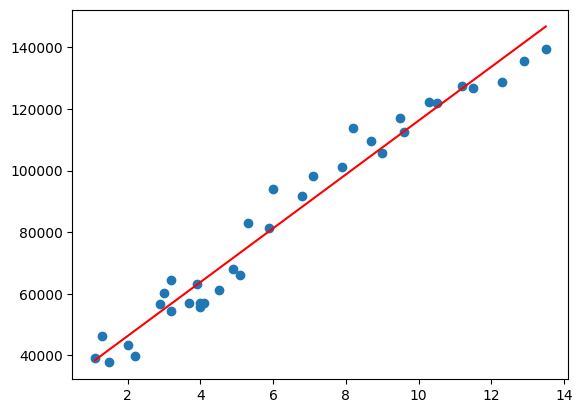

In [ ]:
y_salary_pred = b0 + b1 * X_years

plt.scatter(X_years, y_salary)
plt.plot(X_years, y_salary_pred, color="red")
plt.show()

Vamos a predecir el salario de un trabajador cuando cumpla 15 años de experiencia:

Predicted Salary: [159838.64190047]


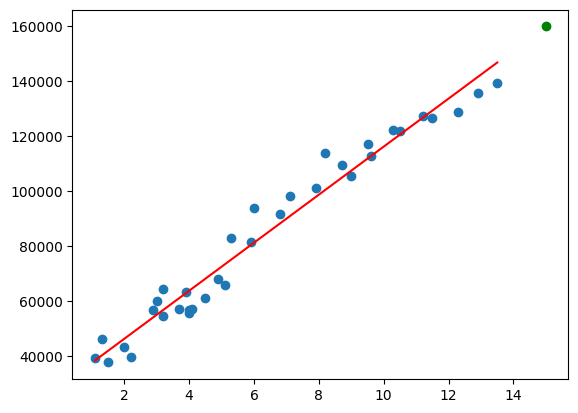

In [ ]:
x_years_to_predict = np.array([15])
y_salary_predicted = regressor.predict(x_years_to_predict)
print(f"Predicted Salary: {y_salary_predicted}")

plt.scatter(X_years, y_salary)
plt.plot(X_years, y_salary_pred, color="red")
plt.scatter(x_years_to_predict, y_salary_predicted, color="green")
plt.show()

# Ejercicio Práctico (10 min):
Crear una función que recibe como parámetro un índice de masa corporal (suponga que el índice de masa corporal puede ser de máximo 60) de un hombre fumador y prediga el valor de su seguro médico. Entrene el modelo con el siguiente dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

**Resultados esperados:**\
IMC: 20 - Seguro: 16383 aprox.\
IMC: 32 - Seguro: 35208 aprox.

Nota: Valide su algoritmo para que no reciba valores de IMC inválidos.

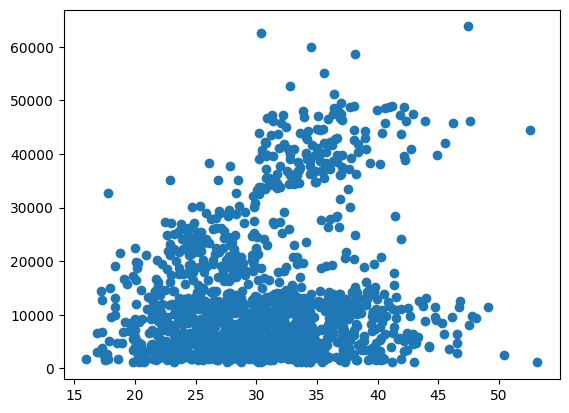

In [ ]:
insurance_data = pd.read_csv("medical-cost.csv")
insurance_data.head()

plt.scatter(x=insurance_data["bmi"], y=insurance_data["charges"])

In [ ]:
insurance_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
# filtrar por hombre fumador
smokers_mask = (insurance_data["sex"] == "male") & (insurance_data["smoker"] == "yes")
male_smokers = insurance_data.loc[smokers_mask, ["bmi", "charges"]]
male_smokers.head()

bmi      charges
14  42.13  39611.75770
19  35.30  36837.46700
29  36.30  38711.00000
30  35.60  35585.57600
34  36.40  51194.55914

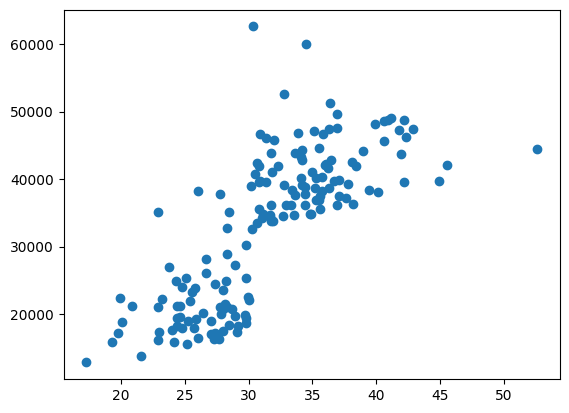

In [ ]:
x_smokers = male_smokers["bmi"]
y_smokers = male_smokers["charges"]

plt.figure()
plt.scatter(x_smokers, y_smokers)
plt.show()

(-12577.628401453498, 1448.0500973517758)
Enter your bmi: 20
The price for your insurance is: [16383.37354558] with an R2 of 0.5919076546104902


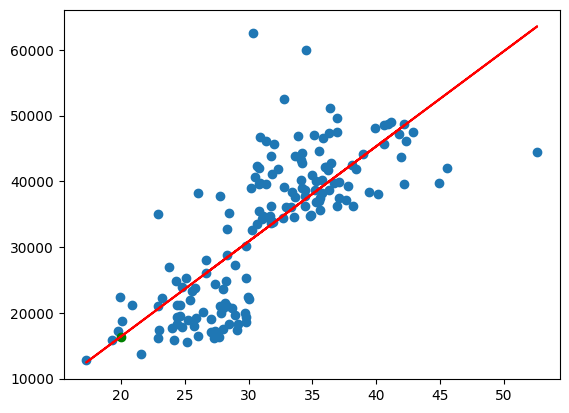

In [ ]:
import re

reg = LinearRegression()
X_smokers = x_smokers.to_numpy()
Y_smokers = y_smokers.to_numpy()
reg.fit(X_smokers, Y_smokers)
print(reg.coef())

def calculate_insurance(bmi: float) -> float:
    if bmi < 0 or bmi > 60:
        raise ValueError("Greater than 0 and less than 60")
    value_to_predict = np.array([bmi])
    insurance = reg.predict(value_to_predict)
    r2 = reg.score(X_smokers, Y_smokers)
    return (insurance, r2)

try:
    bmi_input = input("Enter your bmi: ")
    number_regex = r"(-)?\d+(\.\d+)?"
    if not re.match(number_regex, bmi_input):
        raise ValueError("Invalid datatype: must be a number")
    bmi = np.array([float(bmi_input)])
    insurance, r2 = calculate_insurance(bmi)
    print(f"The price for your insurance is: {insurance[0]} with an R2 of {r2}")


except Exception as err:
    print(f"An error has occured: {err}")

y_pred = reg.predict(X_smokers)
plt.figure()
plt.scatter(X_smokers, Y_smokers)
plt.plot(X_smokers, y_pred, "r-")
plt.scatter(bmi, insurance, color="green")
plt.show()

# 5.3. Regresiones Lineales con Seaborn

# 5.3.1. Regresión Lineal con jointplot() de Seaborn

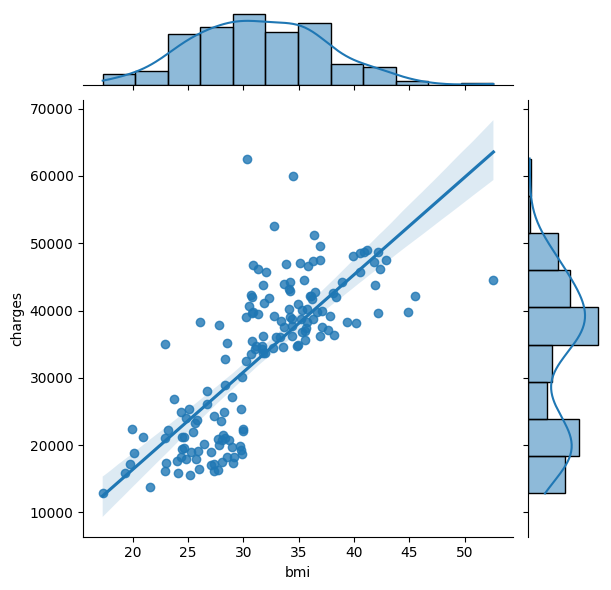

In [ ]:
import seaborn as sns
sns.jointplot(data=male_smokers, x="bmi", y="charges", kind="reg")

# 5.3.2. Regresión Lineal con lmplot() de Seaborn

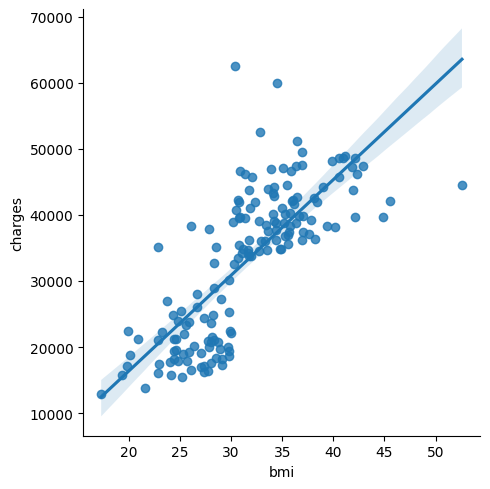

In [ ]:
sns.lmplot(data=male_smokers, x="bmi", y="charges")

# 5.4. Regresión Lineal con StatsModels usando la función OLS()
StatsModels es una librería utilizada principalmente para construir y analizar modelos estadísticos. Posee variedad de modelos e informes de resultados detallados.

In [ ]:
import statsmodels.api as sm

insurance_data = pd.read_csv("medical-cost.csv")

smokers_mask = (insurance_data["sex"] == "male") & (insurance_data["smoker"] == "yes")
male_smokers = insurance_data.loc[smokers_mask, ["bmi", "charges"]]

x_sm = male_smokers["bmi"]
y_sm = male_smokers["charges"]

X_sm = sm.add_constant(x_sm) # important to add the intercept!
model = sm.OLS(y_sm, X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     227.7
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           2.29e-32
Time:                        22:22:09   Log-Likelihood:                -1636.4
No. Observations:                 159   AIC:                             3277.
Df Residuals:                     157   BIC:                             3283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.258e+04   3076.259     -4.089      0.000   -1.87e+04   -6501.436
bmi         1448.0501     95.959     15.090      0.000    1258.513    1637.587
==============================================================================
Omnibus:                       21.973   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.865
Skew:                           0.696   Prob(JB):                     9.88e-09
Kurtosis:                       4.905   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

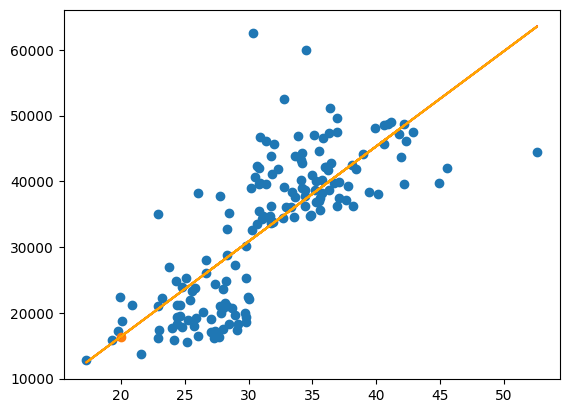

In [ ]:
coef = model.params
coef

# Calcular para IMC = 20
insurance = coef["const"] + coef["bmi"] * (20)
insurance
y_predict_sm = coef["const"] + coef["bmi"] * x_sm

x_to_predict = pd.DataFrame({ "const": [1], "bmi": [20] })
insurance_predicted = model.predict(x_to_predict)
insurance_predicted[0]

plt.figure()
plt.scatter(x_sm, y_sm)
plt.plot(x_sm, y_pred, "r-")
plt.plot(x_sm, y_predict_sm, color="orange")
plt.scatter(20, insurance_predicted[0])
plt.show()

Calculemos ahora la media del error para confirmar

In [ ]:
residues = model.resid
residues.mean() # 0.0000000000254

-2.544297127978607e-11

In [ ]:
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# 5.5. Regresión Lineal Múltiple con StatsModels usando la función OLS()
El ejemplo anterior corresponde a una regresión lineal múltiple, ya que el precio del seguro no solo depende del IMC, si no que también puede depender de la edad y otras variables. Veamos cómo podemos decidir qué variables incluir o no en el modelo.
Consideremos por ejemplo una regresión múltiple incluyendo la variable "children".

In [ ]:
smokers_mask = (insurance_data["sex"] == "male") & (insurance_data["smoker"] == "yes")
smokers_multi = insurance_data.loc[smokers_mask, ["bmi", "children", "charges"]]
smokers_multi

bmi  children      charges
14    42.130         0  39611.75770
19    35.300         0  36837.46700
29    36.300         2  38711.00000
30    35.600         0  35585.57600
34    36.400         1  51194.55914
...      ...       ...          ...
1301  30.875         3  46718.16325
1303  27.800         0  37829.72420
1304  24.605         2  21259.37795
1307  28.120         4  21472.47880
1321  26.695         0  28101.33305

[159 rows x 3 columns]

In [ ]:
import statsmodels.api as sm

x = smokers_multi[["bmi", "children"]]
y = smokers_multi["charges"]

X_sm = sm.add_constant(x)
model = sm.OLS(y, X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     113.4
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           3.85e-31
Time:                        22:37:40   Log-Likelihood:                -1636.2
No. Observations:                 159   AIC:                             3278.
Df Residuals:                     156   BIC:                             3288.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.28e+04   3114.768     -4.108      0.000   -1.89e+04   -6644.206
bmi         1445.7853     96.296     15.014      0.000    1255.572    1635.999
children     244.3811    489.819      0.499      0.619    -723.153    1211.915
==============================================================================
Omnibus:                       22.940   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.803
Skew:                           0.721   Prob(JB):                     3.75e-09
Kurtosis:                       4.943   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos entonces concluir que "children" no es una variable significativa en el modelo. Consideremos ahora la variable "edad" ya que usualmente la edad es importante a la hora del cálculo del valor de un seguro.

In [ ]:
import statsmodels.api as sm

smokers_mask = (insurance_data["sex"] == "male") & (insurance_data["smoker"] == "yes")
smokers_multi = insurance_data.loc[smokers_mask, ["bmi", "age", "charges"]]

x = smokers_multi[["bmi", "age"]]
y = smokers_multi["charges"]

X_sm = sm.add_constant(x)
model = sm.OLS(y, X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     211.3
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           3.99e-45
Time:                        22:43:17   Log-Likelihood:                -1603.4
No. Observations:                 159   AIC:                             3213.
Df Residuals:                     156   BIC:                             3222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.403e+04   2816.031     -8.533      0.000   -2.96e+04   -1.85e+04
bmi         1441.6092     78.253     18.422      0.000    1287.036    1596.182
age          303.1454     33.871      8.950      0.000     236.241     370.050
==============================================================================
Omnibus:                       41.309   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.958
Skew:                           1.072   Prob(JB):                     4.40e-23
Kurtosis:                       6.309   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Obsérvese como el R^2 ajustado aumenta, lo que indica que ésta variable es significativa en el modelo.

# Ejercicio Práctico (3 min):
Usando el resultado anterior, predecir el valor del seguro para un fumador con un IMC de 20 y una edad de 33 años. Demostrar que el valor medio del error es casi cero y cumple con uno de los supuestos de las regresiones lineales.

In [ ]:
# .params
# .predict
# .resid

coef = model.params
predict_data = pd.DataFrame({ "const": [1], "bmi": [20], "age": [33] })
insurace_predicted = model.predict(predict_data)
print(f"Your insurance is {insurance_predicted[0]}")
model.resid.mean()

Your insurance is 16383.37354558246


-1.5146804844620844e-11

# 5.6. Trabajar con variables categóricas introduciendo dummy variables
Los modelos de regresión lineal son modelos numéricos, por tanto para trabajar con variables categóricas debemos reemplazarlas por números. Una vez esto, podemos verificar si son estadísticamente significativos en nuestro modelo.

In [ ]:
insurance_data = pd.read_csv("medical-cost.csv")
insurance_data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
import statsmodels.api as sm

insurance_dataset = insurance_data.copy()
insurance_dataset["smoker"] = insurance_dataset["smoker"].map({ "yes": 1, "no": 0 })
insurance_dataset

age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0       1  southwest  16884.92400
1      18    male  33.770         1       0  southeast   1725.55230
2      28    male  33.000         3       0  southeast   4449.46200
3      33    male  22.705         0       0  northwest  21984.47061
4      32    male  28.880         0       0  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3       0  northwest  10600.54830
1334   18  female  31.920         0       0  northeast   2205.98080
1335   18  female  36.850         0       0  southeast   1629.83350
1336   21  female  25.800         0       0  southwest   2007.94500
1337   61  female  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
insurance_dataset.smoker.value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [ ]:
insurance_dataset.describe()

age          bmi     children       smoker       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918     0.204783  13270.422265
std      14.049960     6.098187     1.205493     0.403694  12110.011237
min      18.000000    15.960000     0.000000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000     0.000000   9382.033000
75%      51.000000    34.693750     2.000000     0.000000  16639.912515
max      64.000000    53.130000     5.000000     1.000000  63770.428010

In [ ]:
x = insurance_dataset[["bmi", "smoker"]]
y = insurance_dataset["charges"]

x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1284.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          1.03e-311
Time:                        23:00:34   Log-Likelihood:                -13760.
No. Observations:                1338   AIC:                         2.753e+04
Df Residuals:                    1335   BIC:                         2.754e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3459.0955    998.279     -3.465      0.001   -5417.463   -1500.728
bmi          388.0152     31.787     12.207      0.000     325.656     450.374
smoker      2.359e+04    480.180     49.136      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      153.688   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.253
Skew:                           0.805   Prob(JB):                     1.11e-52
Kurtosis:                       4.303   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

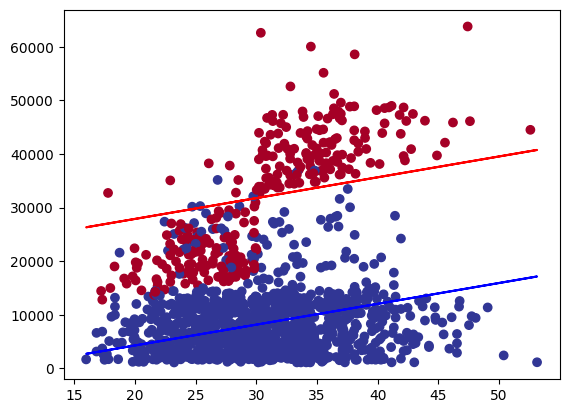

In [ ]:
coef = model.params

y_predicted_general = coef["const"] + coef["bmi"] * x["bmi"] + coef["smoker"] * x["smoker"] # b0 + b1x1 + b2x2
y_predicted_smokers = coef["const"] + coef["bmi"] * x["bmi"] + coef["smoker"] # b0 + b1x1 + b2 = (b0 + b2) + b1x1
y_predicted_no_smokers = coef["const"] + coef["bmi"] * x["bmi"] # b0 + b1x1

plt.figure()
plt.scatter(x["bmi"], y, c=x["smoker"], cmap="RdYlBu_r")
plt.plot(x["bmi"], y_predicted_smokers, "r-")
plt.plot(x["bmi"], y_predicted_no_smokers, "b-")
plt.show()

# 5.7. Regresión Lineal con Scikit-Learn
Es una librería de Machine Learning basada en numpy, scipy y matplotlib. Esto implica que está basada en ndarrays. Contiene variedad de modelos y herramientas como modelos de regresión, clasificación, clustering, etc. Usemos el dataset de salario para hacer una comparativa entre la implementación desde cero de LinearRegression y la implementación de sklearn

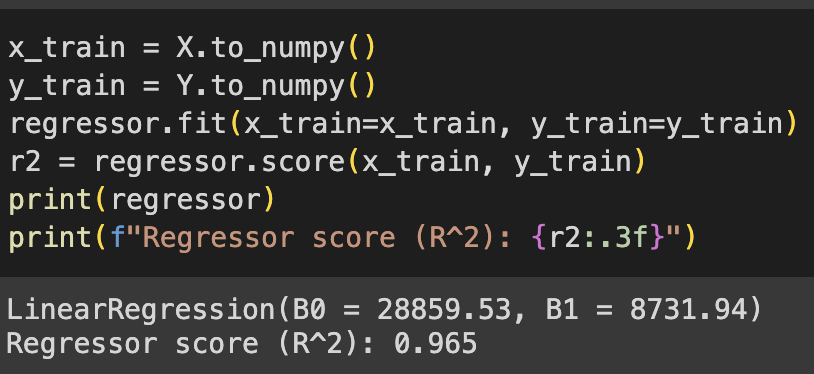

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

dataframe = pd.read_csv("salary.csv")
dataframe.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [ ]:
x_sklearn = dataframe["YearsExperience"].to_numpy()
y_sklearn = dataframe["Salary"].to_numpy()

x_matrix = x_sklearn.reshape(-1, 1)

skreg = LinearRegression()
skreg.fit(x_matrix, y_sklearn)

LinearRegression()

# Obtener R^2 con la función score()

In [ ]:
r2 = skreg.score(x_matrix, y_sklearn)
r2

0.9651633106751443

# Obtener los coeficientes de las variables con el atributo coef_

In [ ]:
coef = skreg.coef_ #b1
coef

array([8731.94104706])

# Obtener el intercepto con el parámetro intercept_

In [ ]:
intercept = skreg.intercept_
intercept

28859.52619453144

# Predicciones
El método predict acepta arreglos de numpy o dataframes. Devuelve un arreglo de numpy con las predicciones.

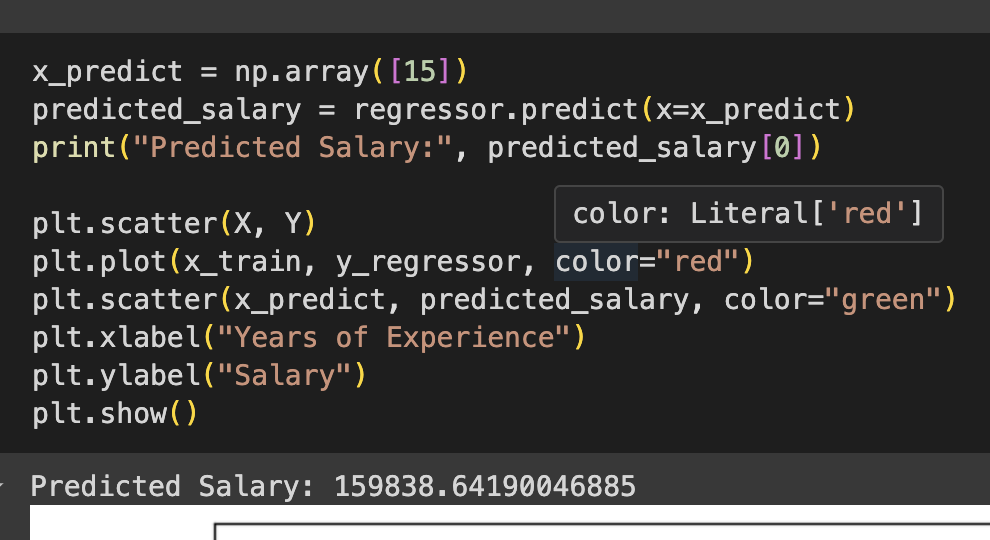

In [ ]:
values_to_predict = np.array([15]).reshape(-1, 1)
predict = skreg.predict(values_to_predict)
predict

array([159838.64190047])

In [ ]:
data_to_predict = pd.DataFrame(data=[15, 20], columns=["YearsExperience"])
data_to_predict

YearsExperience
0               15
1               20

In [ ]:
prediction_data = skreg.predict(data_to_predict)
prediction_data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([159838.64190047, 203498.34713578])

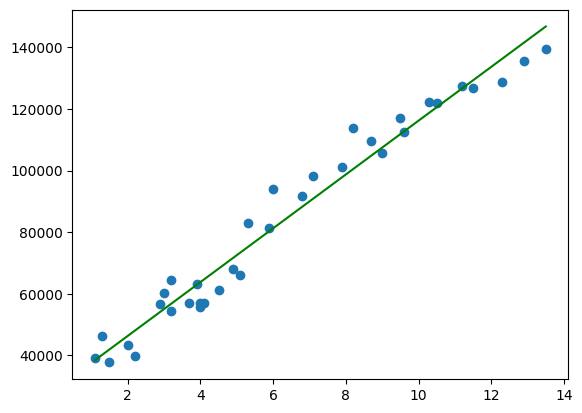

In [ ]:
ypred = skreg.intercept_ + skreg.coef_ * x_matrix
ypred

plt.scatter(x_sklearn, y_sklearn)
plt.plot(x_sklearn, ypred, color="green")
plt.show()

# 5.8. Regresión Lineal Mútiple con Scikit-Learn

Usemos el mismo dataset de seguros, ahora incluyendo la edad y el IMC

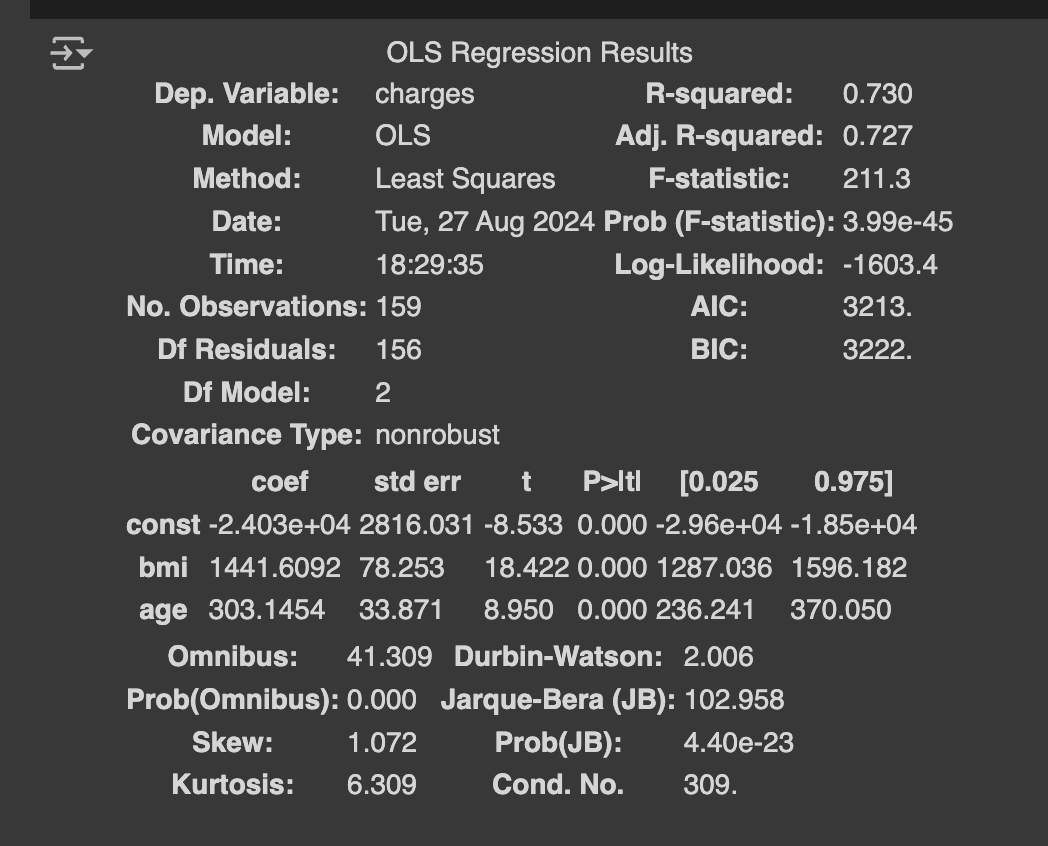

In [ ]:
sk_data = pd.read_csv("medical-cost.csv")
sk_smokers_data = sk_data.loc[(sk_data["sex"] == "male") & (sk_data["smoker"] == "yes")]
x = sk_smokers_data[["bmi", "age"]]
y = sk_smokers_data["charges"]

mskreg = LinearRegression()
mskreg.fit(x, y)
mr2 = mskreg.score(x, y)
mr2

0.7303618706064028

In [ ]:
mskreg.coef_

array([1441.60917277,  303.14536771])

In [ ]:
mskreg.intercept_

-24029.60311130136

# Cómo encontrar el R^2 ajustado usando Sklearn?
No hay un método por defecto para calcularlo, toca construir la función a partir de la definición matemática:

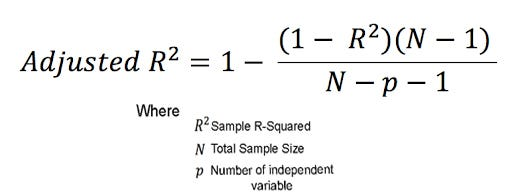

In [ ]:
def adjustedR2(R2: float, N: int, p: int) -> float:
    return np.sqrt(1 - (1 - R2 ** 2) * (N - 1) / (N - p - 1))

mr2 = mskreg.score(x, y)

N, p = x.shape
adjR2 = adjustedR2(mr2, N, p)
print(f"Adj R2: {adjR2:.3f}")

Adj R2: 0.726


# p-values

In [ ]:
from sklearn.feature_selection import f_regression

def calculate_p_values(x, y):
    result = f_regression(x, y)
    return result[1].round(3)

p_values = calculate_p_values(x, y)
print(f"p-values: {p_values[0]}, {p_values[1]}")

p-values: 0.0, 0.0


# 5.9. Overfitting y underfitting

El overfitting se refiere a que el modelo está sesgado por un conjunto de datos en particular. Mientras que el underfitting se refiere a que el modelo no ha podido capturar o describir la lógica del conjunto de datos. Ambos casos conllevan a que el modelo no haga buenas predicciones.

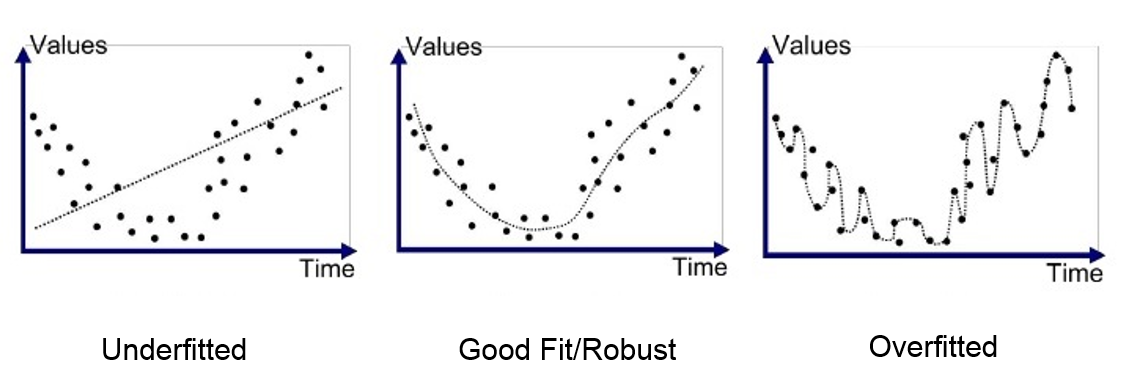

# 5.9.1. Soluciones al underfitting y el overfitting

Para solucionar el underfitting usualmente se requiere tomar más datos y ajustar el modelo. Para el overfitting generalmente dividimos el dataset en dos partes: un 80%-90% del dataset para entrenar o fittear el modelo y el otro 10%-20% para testearlo y verificar que lleva a resultados correctos.

1. Crear la regresión con el conjunto de datos de entrenamiento

2. Testeamos el modelo con el conjunto de datos de prueba y probamos la precisión de éste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

salaries = pd.read_csv("salary.csv")
X = salaries["YearsExperience"].to_numpy()
y = salaries["Salary"].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

skreg = LinearRegression()
skreg.fit(x_train.reshape(-1, 1), y_train)
y_pred = skreg.predict(x_test.reshape(-1, 1))
y_pred

mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
r2

55761791.306260146


0.8914234140042779

# 5.10. Data Cleaning - Ejemplo Práctico
Preparar los datos para construir una regresión que prediga el precio de un automovil de segunda.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

raw_sales = pd.read_csv("car-sales.csv")
raw_sales.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [ ]:
raw_sales.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [ ]:
sales = raw_sales.drop("Model", axis=1)
sales

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4340          yes  2014  
4341          yes  1999  
4342          yes  1985  
4343          yes  2014  
4344          yes  2013  

[4345 rows x 8 columns]

In [ ]:
sales.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
sales_no_mv = sales.dropna(axis=0)
sales_no_mv

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4339          yes  2014  
4340          yes  2014  
4341          yes  1999  
4342          yes  1985  
4344          yes  2013  

[4025 rows x 8 columns]

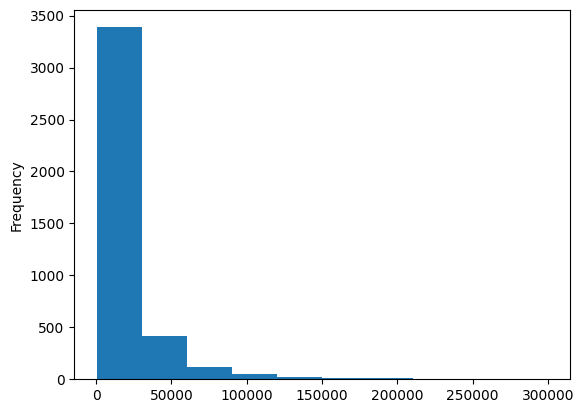

In [ ]:
sales_no_mv["Price"].plot(kind="hist")
plt.show()

In [ ]:
sales_no_mv.describe()

Price      Mileage      EngineV         Year
count    4025.000000  4025.000000  4025.000000  4025.000000
mean    19552.308065   163.572174     2.764586  2006.379627
std     25815.734988   103.394703     4.935941     6.695595
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    90.000000     1.800000  2003.000000
50%     11500.000000   158.000000     2.200000  2007.000000
75%     21900.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000

In [ ]:
q = sales_no_mv["Price"].quantile(0.99)
sales_filt = sales_no_mv.loc[sales_no_mv["Price"] < q]
sales_filt.describe()

Price      Mileage      EngineV         Year
count    3984.000000  3984.000000  3984.000000  3984.000000
mean    17837.117460   165.116466     2.743770  2006.292922
std     18976.268315   102.766126     4.956057     6.672745
min       600.000000     0.000000     0.600000  1969.000000
25%      6980.000000    93.000000     1.800000  2002.750000
50%     11400.000000   160.000000     2.200000  2007.000000
75%     21000.000000   230.000000     3.000000  2011.000000
max    129222.000000   980.000000    99.990000  2016.000000

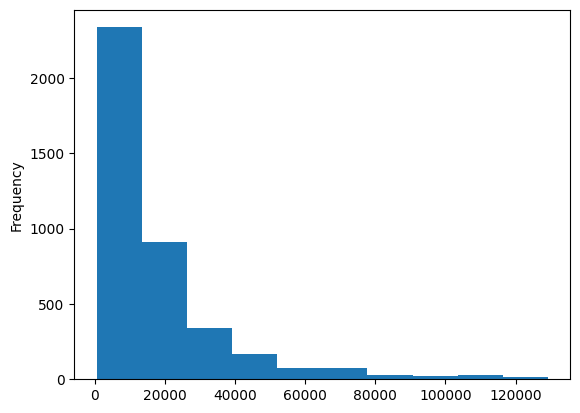

In [ ]:
sales_filt["Price"].plot(kind="hist")
plt.show()

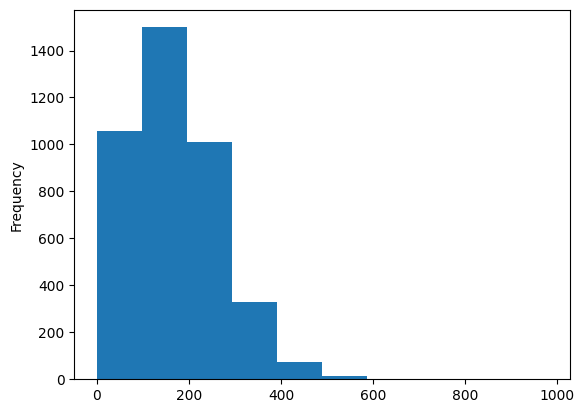

In [ ]:
sales_filt["Mileage"].plot(kind="hist")
plt.show()

In [ ]:
q = sales_no_mv["Mileage"].quantile(0.99)
sales_filt = sales_no_mv.loc[sales_no_mv["Mileage"] < q]
sales_filt.describe()

Price      Mileage      EngineV         Year
count    3984.000000  3984.000000  3984.000000  3984.000000
mean    19668.596878   159.892570     2.768489  2006.479669
std     25893.860852    96.633975     4.960538     6.616733
min       600.000000     0.000000     0.600000  1969.000000
25%      7000.000000    90.000000     1.800000  2003.000000
50%     11500.000000   157.000000     2.200000  2008.000000
75%     21962.250000   227.000000     3.000000  2012.000000
max    300000.000000   433.000000    99.990000  2016.000000

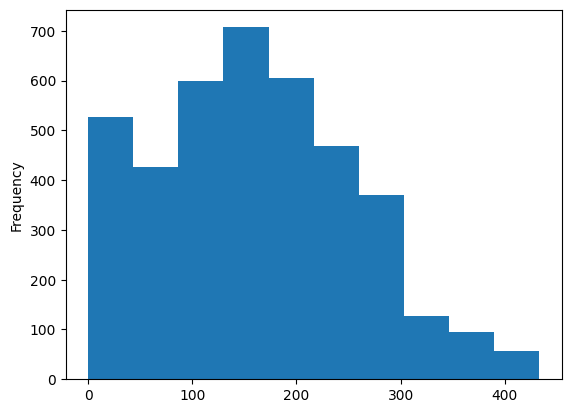

In [ ]:
sales_filt["Mileage"].plot(kind="hist")
plt.show()

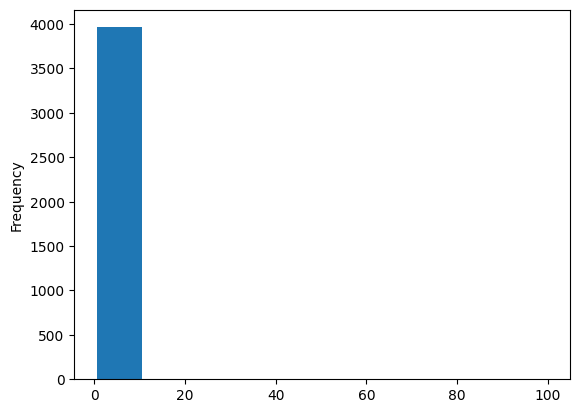

In [ ]:
# q = sales_no_mv["EngineV"].quantile(0.99)
# sales_filt = sales_no_mv.loc[sales_no_mv["Mileage"] < q]
 #sales_filt.describe()

sales_filt["EngineV"].plot(kind="hist")
plt.show()

In [ ]:
sales_filt.describe()
sales2 = sales_filt.loc[sales_filt["EngineV"] < 6.5]
sales2.describe()

Price      Mileage      EngineV         Year
count    3961.000000  3961.000000  3961.000000  3961.000000
mean    19732.659419   159.681141     2.467566  2006.496087
std     25948.825778    96.674553     0.975555     6.616520
min       600.000000     0.000000     0.600000  1969.000000
25%      7000.000000    90.000000     1.800000  2003.000000
50%     11600.000000   156.000000     2.200000  2008.000000
75%     21999.000000   226.000000     3.000000  2012.000000
max    300000.000000   433.000000     6.300000  2016.000000

In [ ]:
data_cleaned = sales2.reset_index(drop=True)
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3956         Toyota   17900.0      sedan       35      1.6      Petrol   
3957  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3958            BMW    6500.0      sedan        1      3.5      Petrol   
3959            BMW    8000.0      sedan      194      2.0      Petrol   
3960     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
3956          yes  2014  
3957          yes  2014  
3958          yes  1999  
3959          yes  1985  
3960          yes  2013  

[3961 rows x 8 columns]

[]

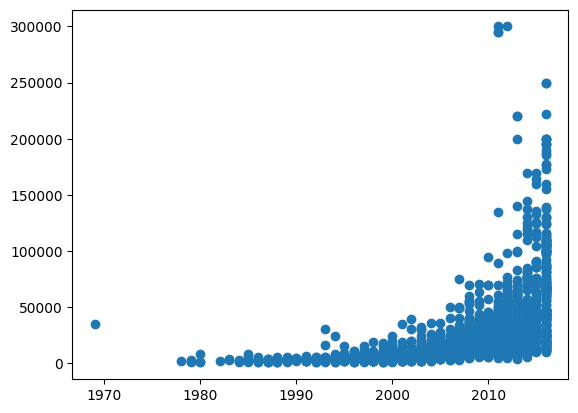

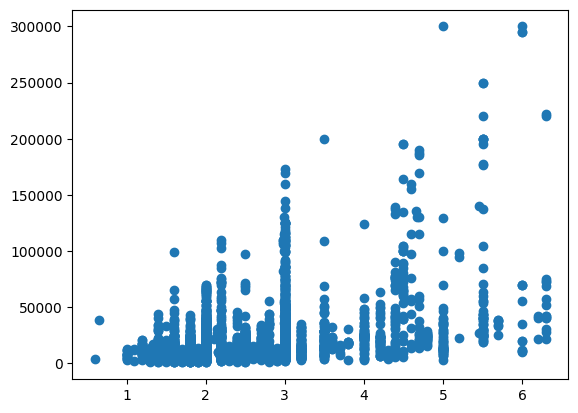

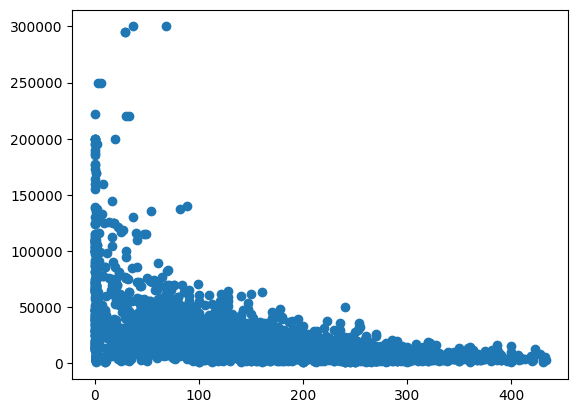

In [ ]:
plt.figure(1)
plt.scatter(data_cleaned["Year"], data_cleaned["Price"])
plt.figure(2)
plt.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
plt.figure(3)
plt.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
plt.plot()

In [ ]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["logprice"] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3956         Toyota   17900.0      sedan       35      1.6      Petrol   
3957  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3958            BMW    6500.0      sedan        1      3.5      Petrol   
3959            BMW    8000.0      sedan      194      2.0      Petrol   
3960     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year   logprice  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3956          yes  2014   9.792556  
3957          yes  2014  11.736069  
3958          yes  1999   8.779557  
3959          yes  1985   8.987197  
3960          yes  2013   9.510445  

[3961 rows x 9 columns]

[]

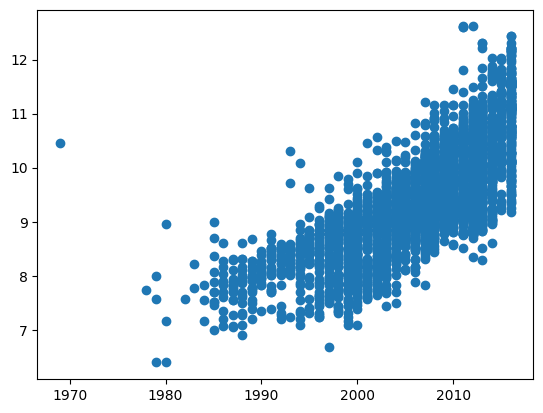

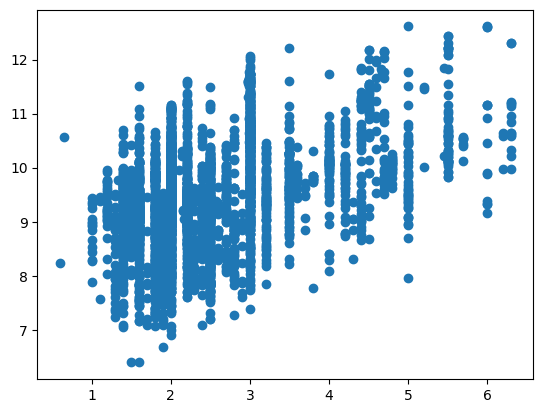

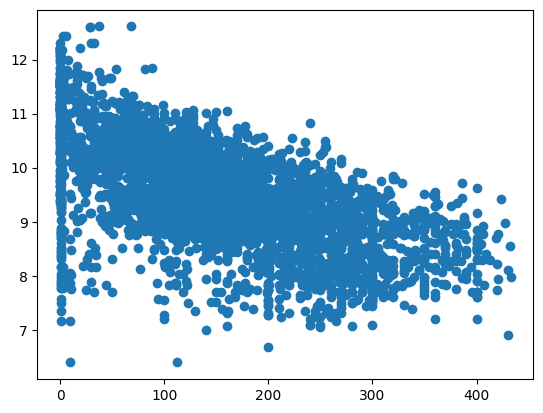

In [ ]:
plt.figure(1)
plt.scatter(data_cleaned["Year"], data_cleaned["logprice"])
plt.figure(2)
plt.scatter(data_cleaned["EngineV"], data_cleaned["logprice"])
plt.figure(3)
plt.scatter(data_cleaned["Mileage"], data_cleaned["logprice"])
plt.plot()

# 5.11. Regresión Logística
Es un modelo usado para predecir variables categóricas. Predice la probabilidad de que ocurra un evento (lógica binaria sí-no => 1-0)

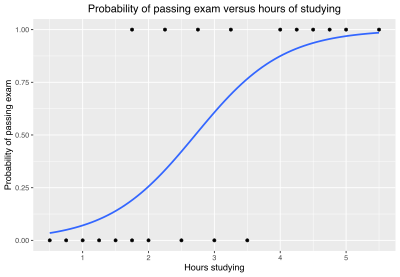

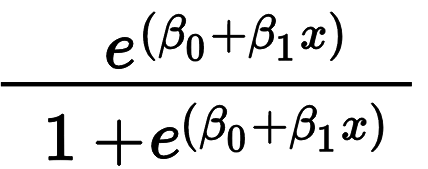

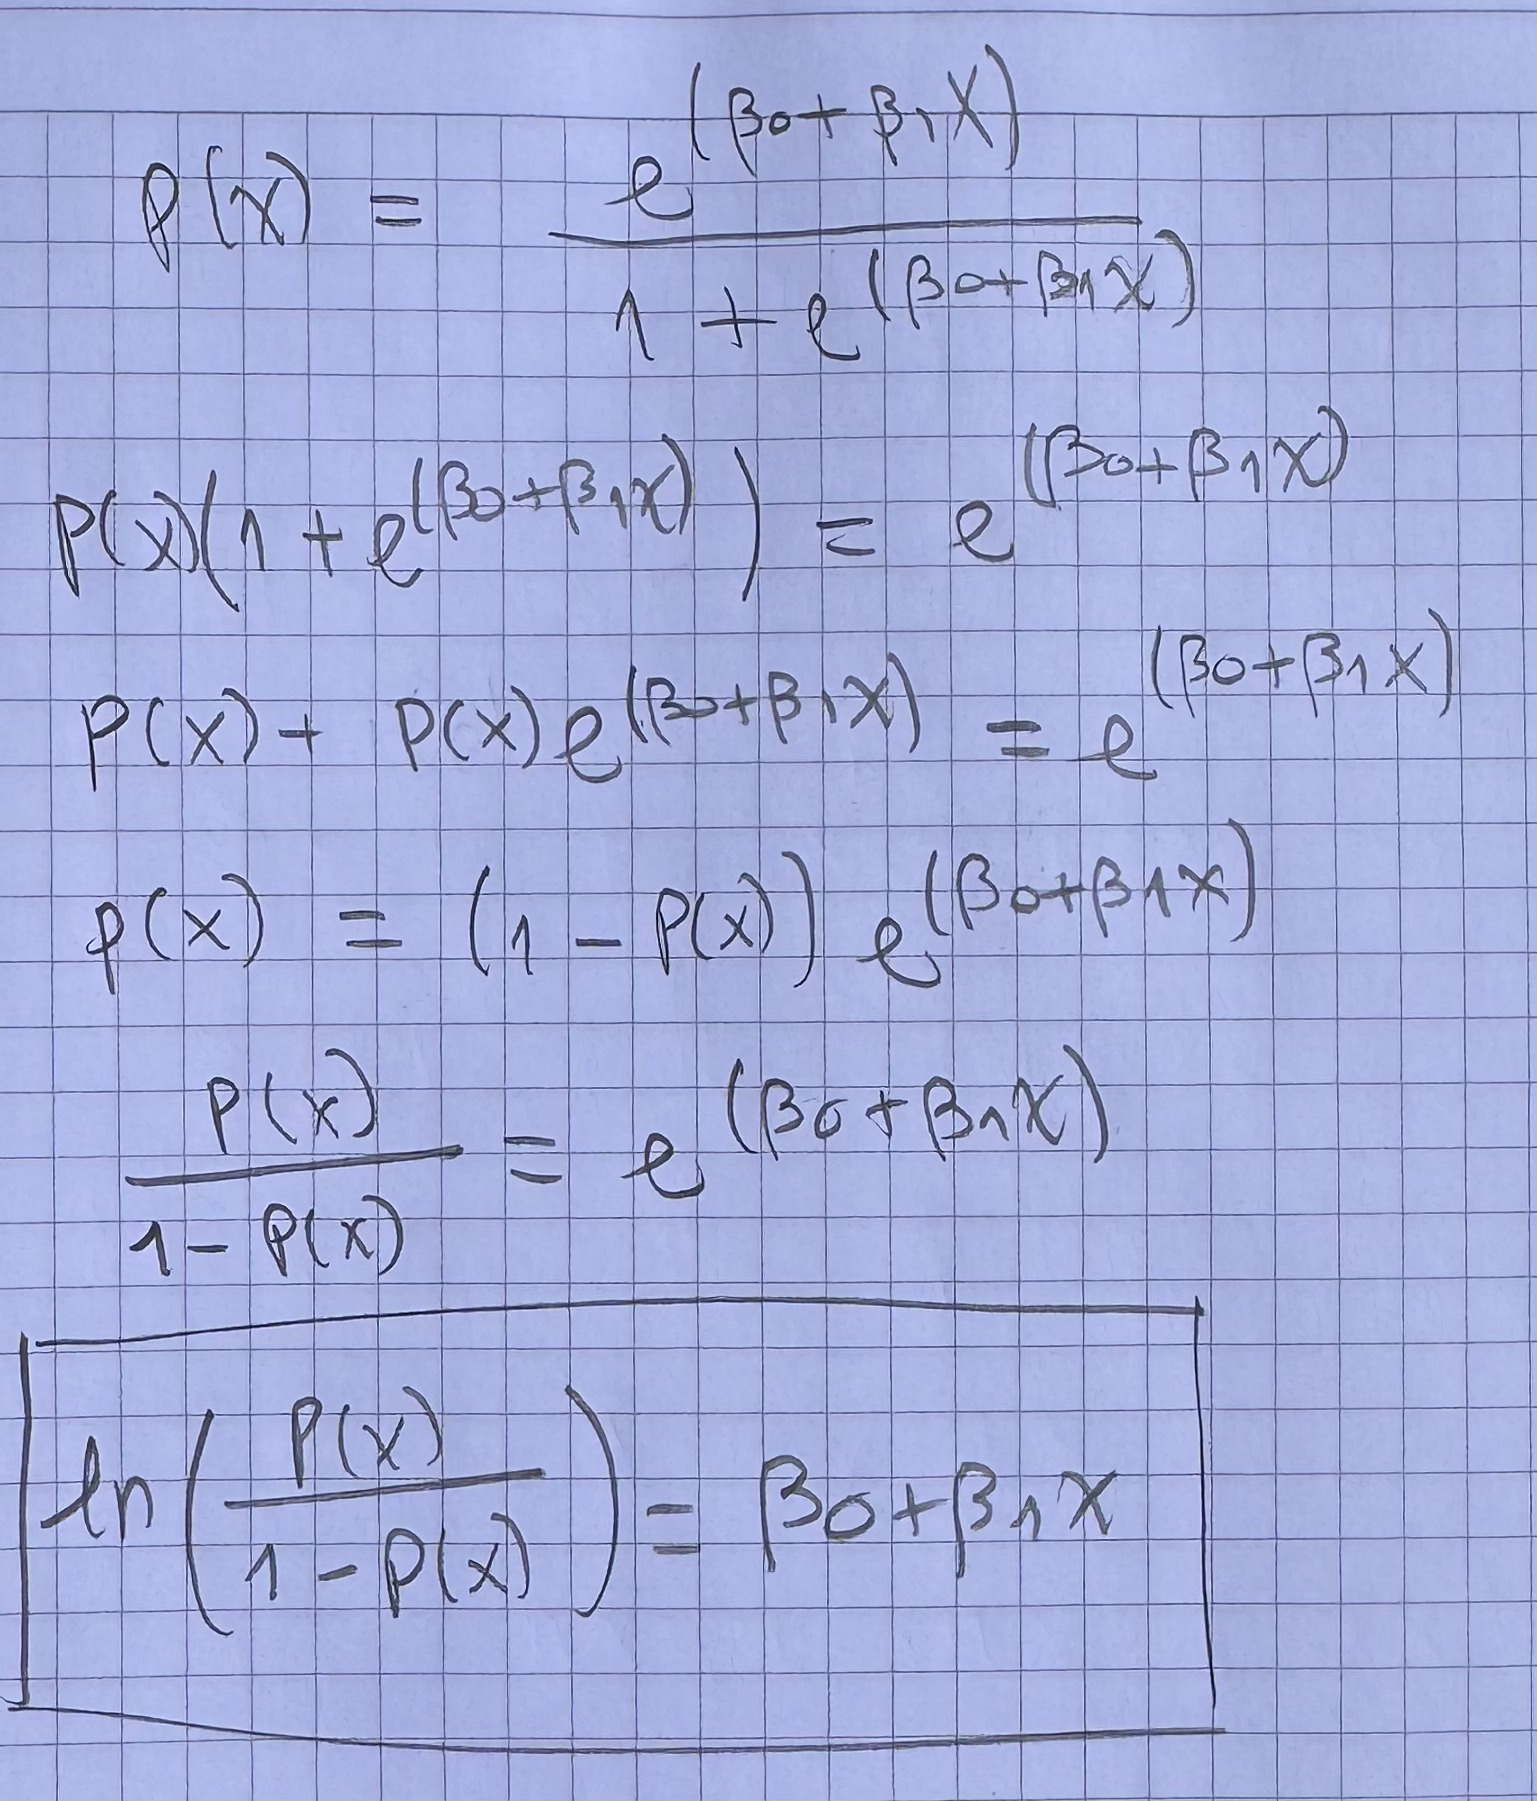

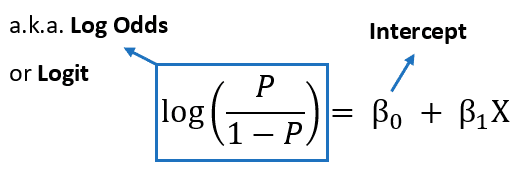

Entendamos la regresión logística con un ejemplo: supongamos que queremos predecir si una persona es elegible para una tarjeta de crédito, dado su salario mensual.

In [ ]:
raw_creditcard = pd.read_csv("credit-card.csv")
raw_creditcard

Eligibility  Monthly Income
0          Yes            4500
1           No            1500
2          Yes            5500
3           No            2000
4          Yes            6200
5           No            1800
6          Yes            7000
7           No            2500
8          Yes            5200
9           No            3000
10         Yes            4800
11          No            2200
12         Yes            5900
13          No            1600
14         Yes            6100
15          No            2300
16         Yes            3000
17          No            4000
18          No            4600
19          No            2400
20         Yes            6800
21          No            1700
22         Yes            4900
23          No            2600
24         Yes            5300
25          No            2100
26         Yes            6400
27          No            1900

Transformemos los valores categóricos de eligibilidad a ceros y unos:

In [ ]:
creditcard = raw_creditcard.copy()
creditcard["Eligibility"] = creditcard["Eligibility"].map({ "Yes": 1, "No": 0 })
creditcard

Eligibility  Monthly Income
0             1            4500
1             0            1500
2             1            5500
3             0            2000
4             1            6200
5             0            1800
6             1            7000
7             0            2500
8             1            5200
9             0            3000
10            1            4800
11            0            2200
12            1            5900
13            0            1600
14            1            6100
15            0            2300
16            1            3000
17            0            4000
18            0            4600
19            0            2400
20            1            6800
21            0            1700
22            1            4900
23            0            2600
24            1            5300
25            0            2100
26            1            6400
27            0            1900

Grafiquemos los puntos para ver qué tendencia siguen:

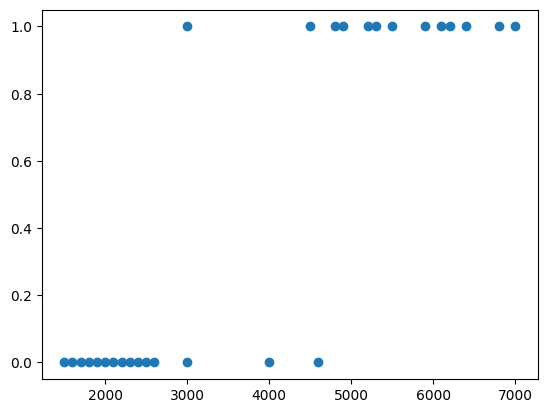

In [ ]:
x_income = creditcard["Monthly Income"]
y_elig = creditcard["Eligibility"]

plt.scatter(x_income, y_elig)
plt.show()

Construyamos la regresión usando StatsModels

In [ ]:
import statsmodels.api as sm

X_income = sm.add_constant(x_income)
logr = sm.Logit(y_elig, X_income).fit()
logr.summary()

Optimization terminated successfully.
         Current function value: 0.201020
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Eligibility   No. Observations:                   28
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.7089
Time:                        00:26:48   Log-Likelihood:                -5.6286
converged:                       True   LL-Null:                       -19.337
Covariance Type:            nonrobust   LLR p-value:                 1.641e-07
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.1412      3.043     -2.675      0.007     -14.105      -2.177
Monthly Income     0.0020      0.001      2.816      0.005       0.001       0.003
==================================================================================
"""

In [ ]:
y_elig_predicted = logr.predict(X_income)

dataframe = pd.DataFrame()
dataframe["Elig"] = y_elig_predicted
dataframe["Income"] = x_income
dataframe

Elig  Income
0   0.739497    4500
1   0.006183    1500
2   0.956244    5500
3   0.016970    2000
4   0.989154    6200
5   0.011347    1800
6   0.997862    7000
7   0.045708    2500
8   0.922161    5200
9   0.117308    3000
10  0.839655    4800
11  0.025308    2200
12  0.980175    5900
13  0.007573    1600
14  0.986731    6100
15  0.030862    2300
16  0.117308    3000
17  0.505711    4000
18  0.776860    4600
19  0.037587    2400
20  0.996788    6800
21  0.009271    1700
22  0.865270    4900
23  0.055484    2600
24  0.935606    5300
25  0.020733    2100
26  0.992763    6400
27  0.013880    1900

Grafiquemos la regresión

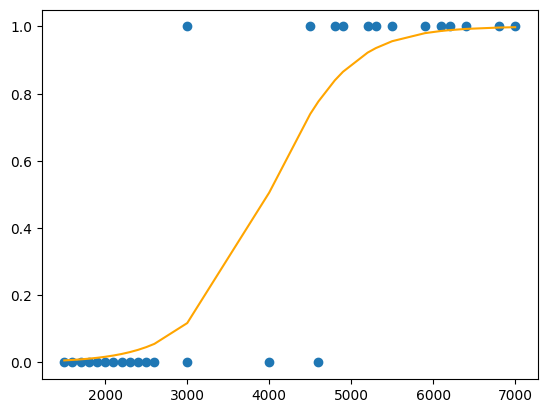

In [ ]:
dataframe.sort_values(by="Income", inplace=True)

plt.scatter(x_income, y_elig)
plt.plot(dataframe["Income"], dataframe["Elig"], color="orange")
plt.show()

# 5.11.1. Matriz de Confusión y precisión del modelo

In [ ]:
cfm = logr.pred_table()
cfm

array([[13.,  2.],
       [ 1., 12.]])

In [ ]:
well_predicted = cfm[0, 0] + cfm[1, 1]
total = cfm.sum()
accuracy = well_predicted / total
accuracy

0.8928571428571429